# Van der Pol Oscillator

Consider the *Van der Pol oscillator* equations
\begin{equation}
    \left\{
    \begin{aligned}
        \dot{x} & = v \\
        \dot{v} & = \mu(1-x^2) v + v
    \end{aligned}
    \right.
\end{equation}

With $\mathbf{y} = [x, v]^T$, we can write them as a single vector equation
\begin{equation}
    \dot{\mathbf{y}} = f(\mathbf{y}; \mu).
\end{equation}

Let's write a function m-file for the vector-field on the right-hand side:

In [1]:
%%file myvdp.m
function dy = myvdp(t, y, mu)
    dy = [y(2);
          mu*(1-y(1)^2)*y(2) - y(1)];
end

Created file '/home/tae/Dropbox/Sp19-Math3607/lectures/myvdp.m'.


Using `ode45`, we solve the equation with $\mu = 2$ and $\mathbf{y}(0) = [3, 1]^T$.

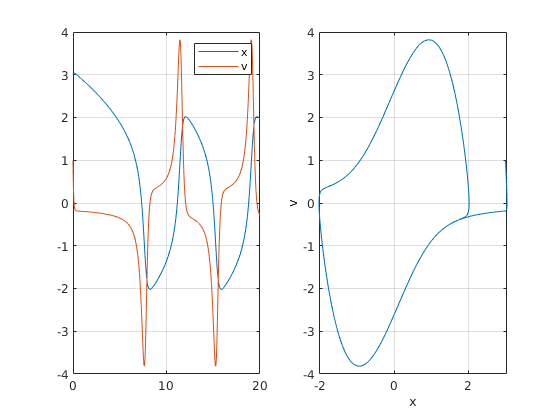

In [2]:
mu = 2;
tspan = 0:0.01:20;
y0 = [3; 1];

options = odeset('RelTol', 1e-4, 'AbsTol', 1e-4);
[t,y] = ode45(@(t,y) myvdp(t,y,mu), tspan, y0, options);

subplot(121) % plot  x  and  v  against  t
plot(t, y)
legend('x', 'v')
grid on

subplot(122) % phase diagram
plot(y(:,1), y(:,2))
xlabel('x')
ylabel('v')
grid on

# Lorenz Model

The Lorenz model is a nonlinear system given by
\begin{equation}
\left\{
    \begin{aligned}
        \dot{x} & = \sigma(y-x) \\
        \dot{y} & = x(\rho-z) - y \\
        \dot{z} & = xy - \beta z
    \end{aligned}
\right.
\end{equation}

Some parameters may lead to *chaos*, e.g.
$$
    \sigma = 10, \quad \beta = 8/3, \quad \rho = 28 .
$$

In [3]:
%%file lorenz.m
function dw = lorenz(t, w, sigma, beta, rho)
    dw = [sigma*(w(2)-w(1));
          w(1)*(rho-w(3)) - w(2);
          w(1)*w(2) - beta*w(3)];
end

Created file '/home/tae/Dropbox/Sp19-Math3607/lectures/lorenz.m'.


This time, instead of using MatLab's `ode45`, let's write our own 4th order Runge-Kutta code for exploration.

In [4]:
%%file rk4singlestep.m
function yout = rk4singlestep(f, dt, tk, yk)
    f1 = f(tk, yk);
    f2 = f(tk+dt/2, yk+f1*dt/2);
    f3 = f(tk+dt/2, yk+f2*dt/2);
    f4 = f(tk+dt, yk+f3*dt);
    yout = yk + (f1 + 2*f2 + 2*f3 + f4)*dt/6;
end

Created file '/home/tae/Dropbox/Sp19-Math3607/lectures/rk4singlestep.m'.


Using the parameters given above, let's solve the system with initial condition
$$
    \mathbf{w}(0) = [-8, 8, 27]^T
$$
where $\mathbf{w} = [x, y, z]^T$.

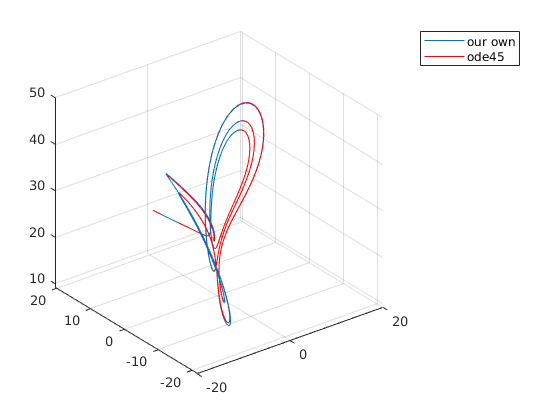

In [5]:
% Lorenz's origianl parameters
sigma = 10;
beta = 8/3;
rho = 28;

% Initial condition
w0 = [-8; 8; 27];

% Computing the trajectory
dt = 0.01;
T = 4;
tspan = 0:dt:T;
n = length(tspan) - 1;

W = zeros(3, n+1);
W(:,1) = w0;
for k = 1:n
    W(:,k+1) = rk4singlestep(@(t,w) lorenz(t, w, sigma, beta, rho), ...
                             dt, tspan(k), W(:,k));
end

[t, w] = ode45(@(t,w) lorenz(t,w,sigma,beta,rho), tspan, w0);


figure(2)
plot3(W(1,:), W(2,:), W(3,:))
grid on
hold on
plot3(w(:,1), w(:,2), w(:,3), 'r');
legend('our own', 'ode45')


# Lorenz Model for Multiple Particles

Now, we will keep track of multiple particles under the Lorenzian equations. 

```octave
%% Slow version

% Lorenz's origianl parameters
sigma = 10;
beta = 8/3;
rho = 28;

% Initial condition - large cueb of points
xvec = -20:2:20;
yvec = -20:2:20;
zvec = -20:2:20;
[x0,y0,z0] = meshgrid(xvec, yvec, zvec);
nrgrid = length(xvec);

w0(1,:,:,:) = x0;
w0(2,:,:,:) = y0;
w0(3,:,:,:) = z0;

plot3(w0(1,:), w0(2,:), w0(3,:), '.', 'MarkerSize', 5)
axis([-40 40 -40 40 -40 40])
view(40, 40);

% compute all trajectories
dt = 0.01;
T = 4;
tspan = 0:dt:T;
n = length(tspan) - 1;


W = w0;

% slow because MATLAB is not compiled
for m = 1:n
    for i = 1:length(xvec)
        for j = 1:length(yvec)
            for k = 1:length(zvec)
                win = W(:,i,j,k);
                wout = rk4singlestep(@(t,w) lorenz(t,w, sigma,beta,rho), ...
                                     dt, tspan(m), win);
                W(:,i,j,k) = wout;
            end
        end
    end
    plot3(W(1,:), W(2,:), W(3,:), '.')
    axis([-40 40 -40 40 -40 40])
    view(20, 40)
    drawnow
end
```

The script below utilizes vectorization.

In [6]:
%%file lorenzVEC.m
function dw = lorenzVEC(t, w, sigma, beta, rho)
% w is a 3-D vector
    dw = [sigma*(w(2,:,:,:)-w(1,:,:,:));
          w(1,:,:,:).*(rho-w(3,:,:,:)) - w(2,:,:,:);
          w(1,:,:,:).*w(2,:,:,:) - beta*w(3,:,:,:)];
end

Created file '/home/tae/Dropbox/Sp19-Math3607/lectures/lorenzVEC.m'.


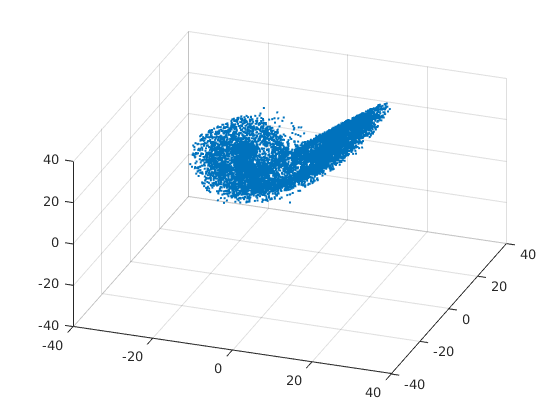

In [7]:
clear all
% Lorenz's origianl parameters
sigma = 10;
beta = 8/3;
rho = 28;

% Initial condition - large cueb of points
% shift = [-8; 8; 27];
xvec = -20:2:20;
yvec = -20:2:20;
zvec = -20:2:20; 
% [x0,y0,z0] = meshgrid(xvec+shift(1), yvec+shift(2), zvec+shift(3));
[x0,y0,z0] = meshgrid(xvec, yvec, zvec);
nrgrid = length(xvec);

w0(1,:,:,:) = x0;
w0(2,:,:,:) = y0;
w0(3,:,:,:) = z0;

plot3(w0(1,:), w0(2,:), w0(3,:), '.', 'MarkerSize', 5)
axis([-40 40 -40 40 -40 40])
view(40, 40);

% compute all trajectories
dt = 0.01;
T = 4;
tspan = 0:dt:T;
n = length(tspan) - 1;

Wold = w0;

for m = 1:n
    Wnew = rk4singlestep(@(t,w) lorenzVEC(t,w,sigma,beta,rho), dt, ...
                         tspan(m), Wold);
    plot3(Wnew(1,:), Wnew(2,:), Wnew(3,:), '.', 'MarkerSize', 5)
    axis([-40 40 -40 40 -40 40])
    view(20+360*m/n, 40);
    grid on
    drawnow
    Wold = Wnew;
end

The codes shown in class on April 12 were written to avoid manipulating 4-D arrays. 

**ODE function** `lorenzVEC.m`

```octave
function dw = lorenzVEC(t, w, sigma, beta, rho)
% w is a 3 x N matrix
    dw = [sigma*(w(2,:)-w(1,:));
          w(1,:).*(rho-w(3,:)) - w(2,:);
          w(1,:).*w(2,:) - beta*w(3,:)];
end
```

**Simulation Script** `simlorenzFAST.m`

```octave
% Lorenz's origianl parameters
sigma = 10;
beta = 8/3;
rho = 28;

% Initial conditions: ask users to choose size of initial conditions
cubeSize = input(' Size of initial cube: (Options: s/m/l) ');
if strcmp(cubeSize, 's')
    vec = -.1:.01:.1;
    IC = [-8; 8; 27];
elseif strcmp(cubeSize, 'm')
    vec = -1:.1:1;
    IC = [-8; 8; 27];
elseif strcmp(cubeSize, 'l')
    vec = -20:2:20;
    IC = zeros(3, 1);
end  
[x0,y0,z0] = meshgrid(vec+IC(1), vec+IC(2), vec+IC(3));
w0 = [x0(:), y0(:), z0(:)]';

% Plotting parameters
MS = 'MarkerSize'; ms = 5;
L = 60;
xyzlim = [-L L -L L -L L];
AZ = 40; EL = 15;

% Compute all trajectories
dt = 0.01;
T = 4;
tspan = 0:dt:T;
n = length(tspan) - 1;
wold = w0;
for k = 1:n
    w = rk4(@(t,ww) lorenzVEC(t,ww,sigma,beta,rho), dt, ...
                tspan(k), wold);
    plot3(w(1,:), w(2,:), w(3,:), '.', MS, ms)
    grid on, axis equal, axis(xyzlim)
    view(AZ+360*k/n, EL);
    drawnow
    wold = w;
end
```